In [11]:
import subprocess

subprocess.run(['python', 'gen_stats.py'])

CI SONO  72 AGENTI
Running Simulation with task distribution estimation...
DEADLOCK  agent27
Path collisions:  0
Switch collisions:  0
Confronto tra costi teorici e costi reali: 
Costo stimato:  3201
Costo reale:  3443
Saving stats in stats_with_learning.csv...
Saving estimated and real costs per task in costs_learning.csv...
Running Simulation with fixed task distribution...
Path collisions:  0
Switch collisions:  0
Confronto tra costi teorici e costi reali: 
Costo stimato:  2684
Costo reale:  2940
Saving stats in stats_without_learning.csv...
Saving estimated and real costs per task in costs.csv...


CompletedProcess(args=['python', 'gen_stats.py'], returncode=0)

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

df_learning = pd.read_csv("stats_with_learning.csv")
df = pd.read_csv("stats_without_learning.csv")

number_of_tasks = df["number_of_tasks"].iloc[0]

df = df.drop(["number_of_tasks"], axis=1)
df_learning = df_learning.drop(["number_of_tasks"], axis=1)

print("Stats with Task Distribution Estimation\n", df_learning)
print("Stats without Task Distribution Estimation\n", df)

Stats with Task Distribution Estimation
       time  costs  serv_times  start_to_pickup_times  pickup_to_goal_times  \
0        0      0    0.000000               0.000000              0.000000   
1        1      6    0.000000               1.000000              0.000000   
2        2      8    0.000000               1.000000              0.000000   
3        3     10    0.000000               1.000000              0.000000   
4        4     12    0.000000               1.000000              0.000000   
...    ...    ...         ...                    ...                   ...   
1956  1956   3916  768.211145             764.621166             42.568507   
1957  1957   3918  768.775166             765.167603             42.571794   
1958  1958   3920  769.338611             765.713483             42.575077   
1959  1959   3922  769.901480             766.258806             42.578356   
1960  1960   3924  770.469898             766.803571             42.582143   

      runtimes  
0    

In [15]:
dfCosts = pd.read_csv("costs.csv")
dfCostsLearning = pd.read_csv("costs_learning.csv")

print(sum(dfCosts['estimated']), sum(dfCosts['real']))
print(sum(dfCostsLearning['estimated']), sum(dfCostsLearning['real']))

3096 2936
3907 3747


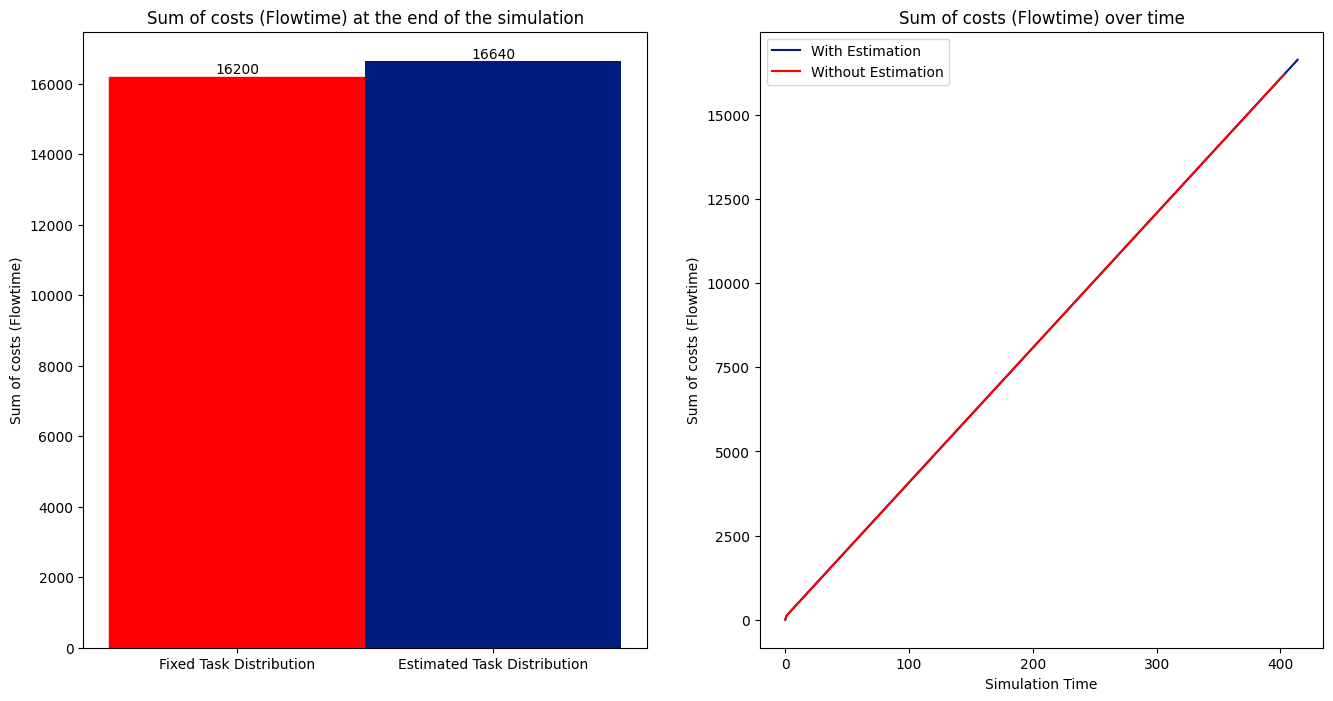

In [68]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=[cost, cost_learning])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Sum of costs (Flowtime) at the end of the simulation")
ax[0].set_ylabel("Sum of costs (Flowtime)")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Estimation")
ax[1].plot(df["time"], df["costs"], label="Without Estimation", color="r")
ax[1].set_title("Sum of costs (Flowtime) over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Sum of costs (Flowtime)")

ax[1].legend()

plt.show()

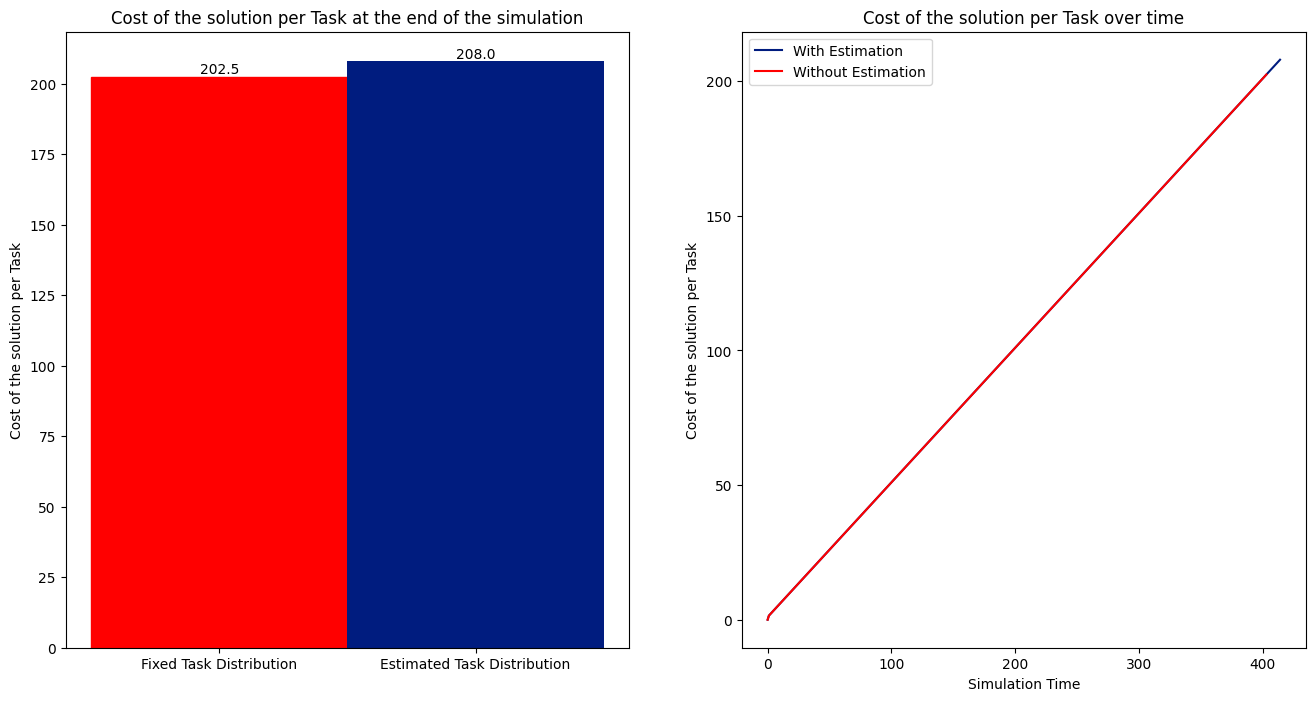

In [69]:
costs_per_task = df['costs'].apply(lambda x: x / number_of_tasks)
costs_per_task_learning  = df_learning['costs'].apply(lambda x: x / number_of_tasks)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=[costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Cost of the solution per Task at the end of the simulation")
ax[0].set_ylabel("Cost of the solution per Task")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], costs_per_task_learning, label="With Estimation")
ax[1].plot(df["time"], costs_per_task, label="Without Estimation", color="r")
ax[1].set_title("Cost of the solution per Task over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Cost of the solution per Task")

ax[1].legend()

plt.show()

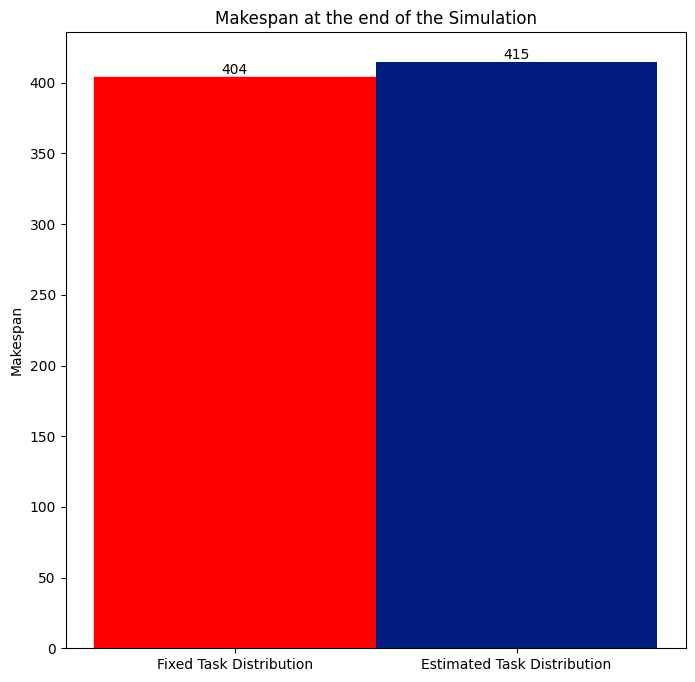

In [70]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

plt.figure(figsize=(8, 8))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=[makespan, makespan_learning])
plt.xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
bars[0].set_color('r')
plt.title("Makespan at the end of the Simulation")
plt.ylabel("Makespan")

plt.show()

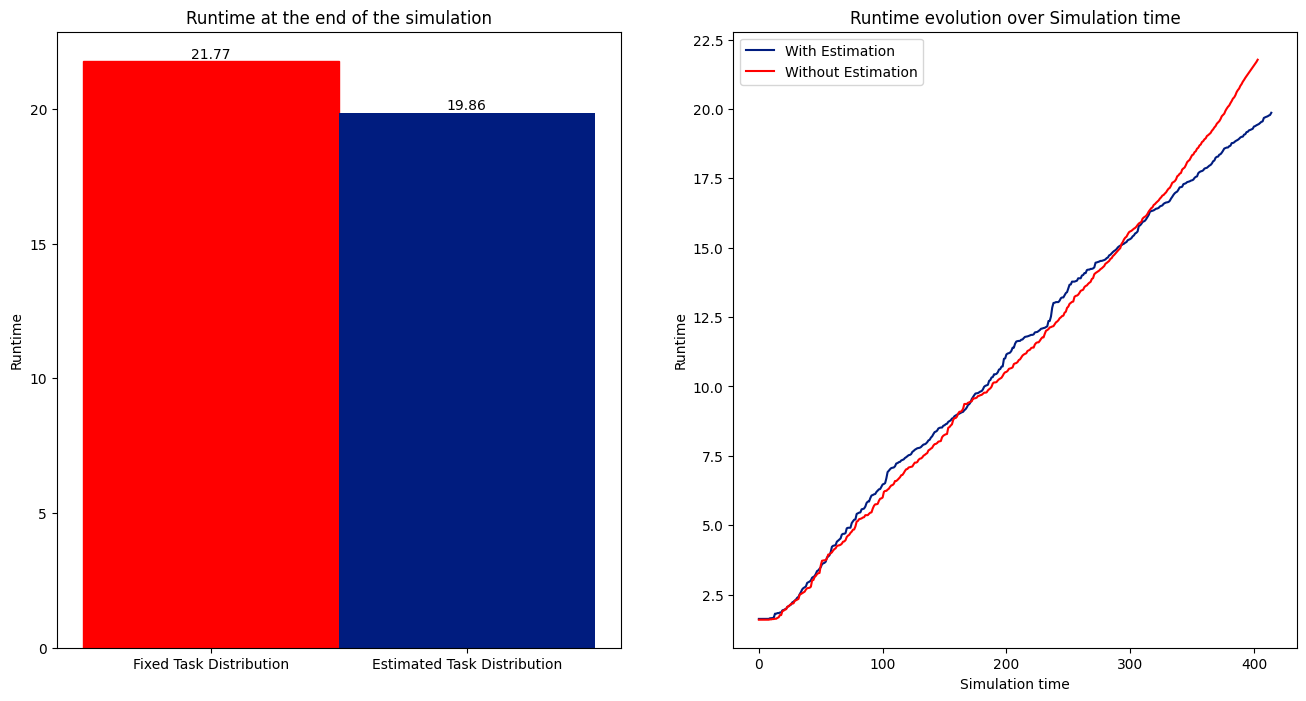

In [71]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Runtime at the end of the simulation")
ax[0].set_ylabel("Runtime")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Estimation")
ax[1].plot(df["time"], df["runtimes"], label="Without Estimation", color="r")
ax[1].set_title("Runtime evolution over Simulation time")
ax[1].set_xlabel('Simulation time')
ax[1].set_ylabel("Runtime")

ax[1].legend()

plt.show()

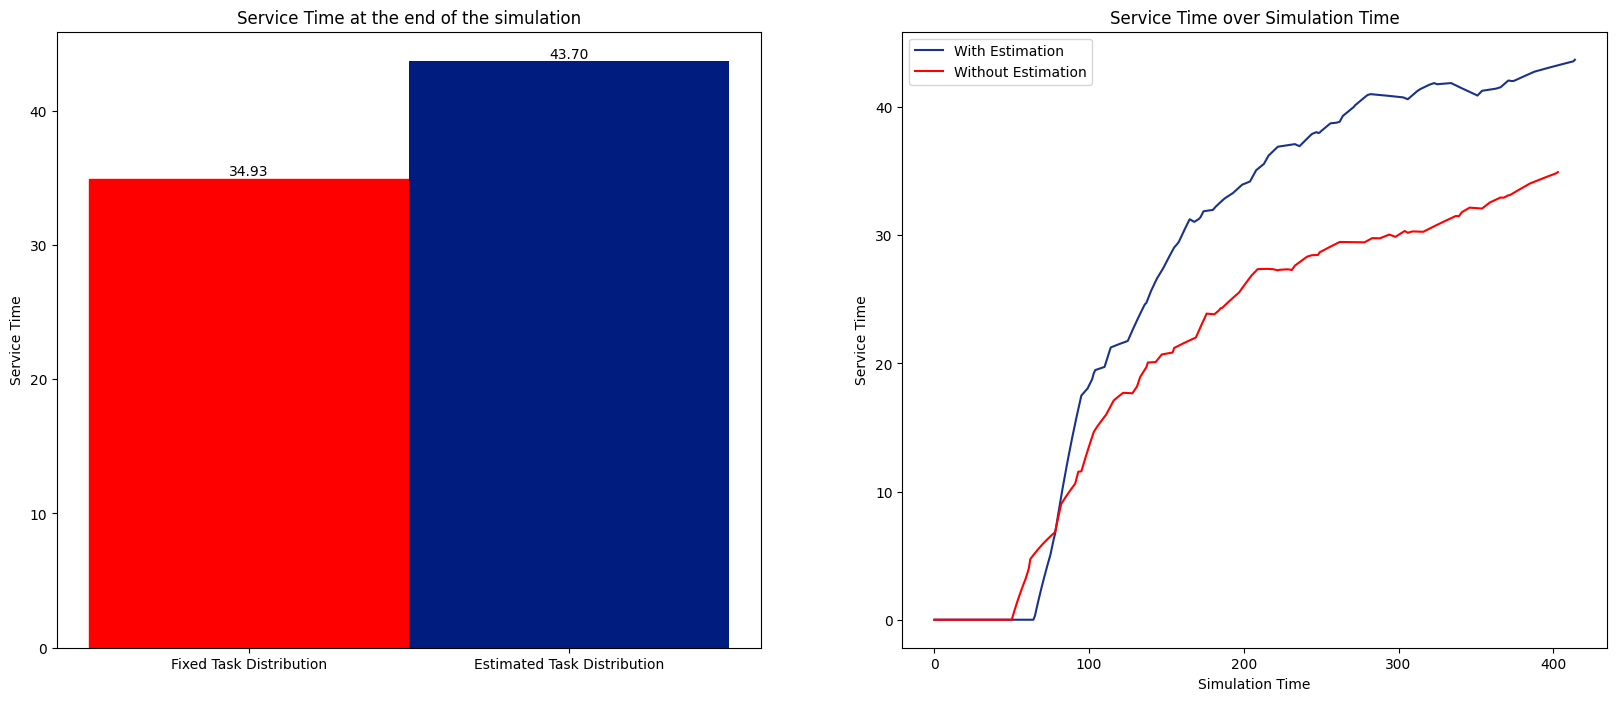

In [72]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["serv_times"].iloc[-1], df_learning["serv_times"].iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(df["serv_times"].iloc[-1]), "{:.2f}".format(df_learning["serv_times"].iloc[-1])])
bars[0].set_color('r')
ax[0].set_title("Service Time at the end of the simulation")
ax[0].set_ylabel("Service Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["serv_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["serv_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Service Time')
ax[1].set_xlabel('Simulation Time')
ax[1].set_title('Service Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()

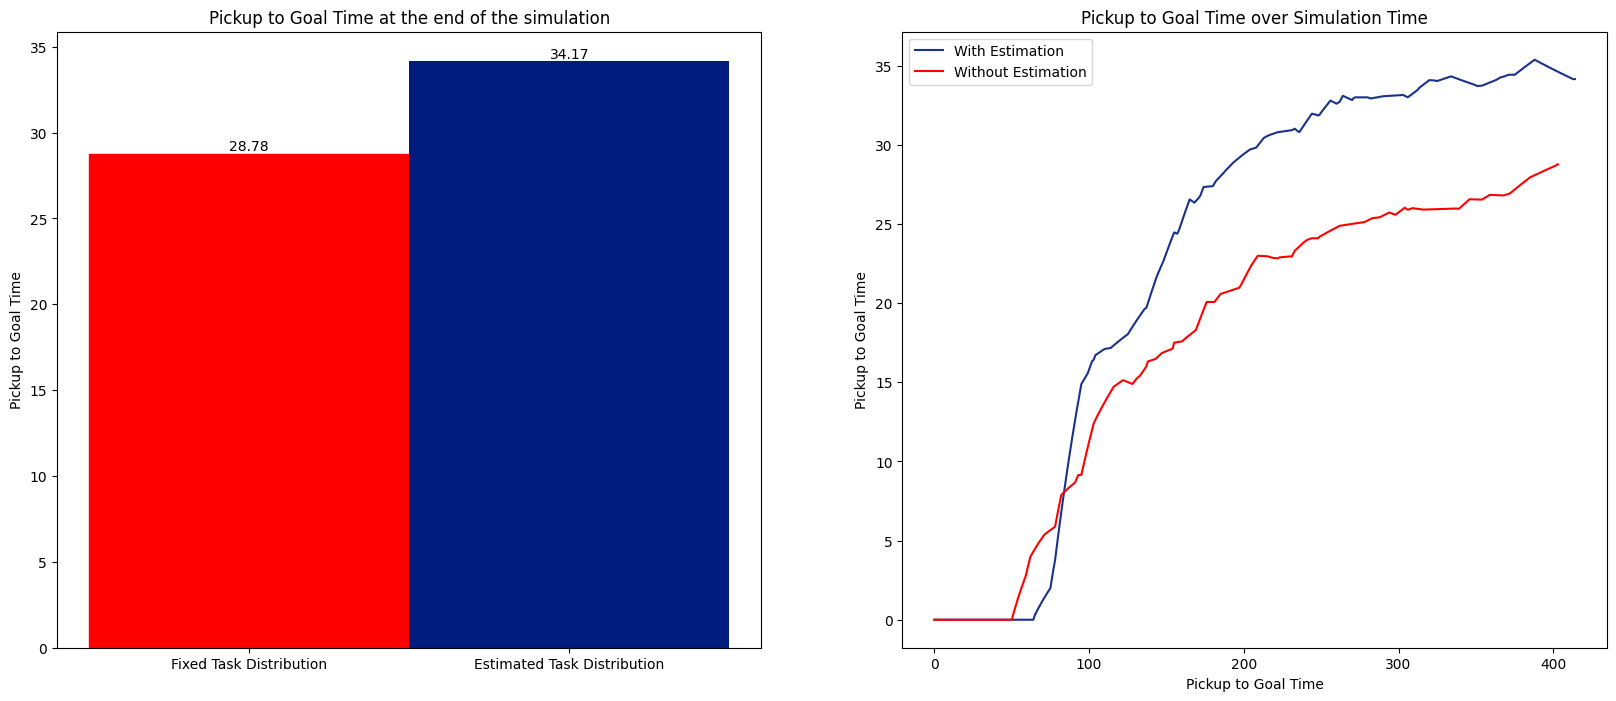

In [73]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["pickup_to_goal_times"].iloc[-1], df_learning["pickup_to_goal_times"].iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(df["pickup_to_goal_times"].iloc[-1]), "{:.2f}".format(df_learning["pickup_to_goal_times"].iloc[-1])])
bars[0].set_color('r')
ax[0].set_title("Pickup to Goal Time at the end of the simulation")
ax[0].set_ylabel("Pickup to Goal Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["pickup_to_goal_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["pickup_to_goal_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Pickup to Goal Time')
ax[1].set_xlabel('Pickup to Goal Time')
ax[1].set_title('Pickup to Goal Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()

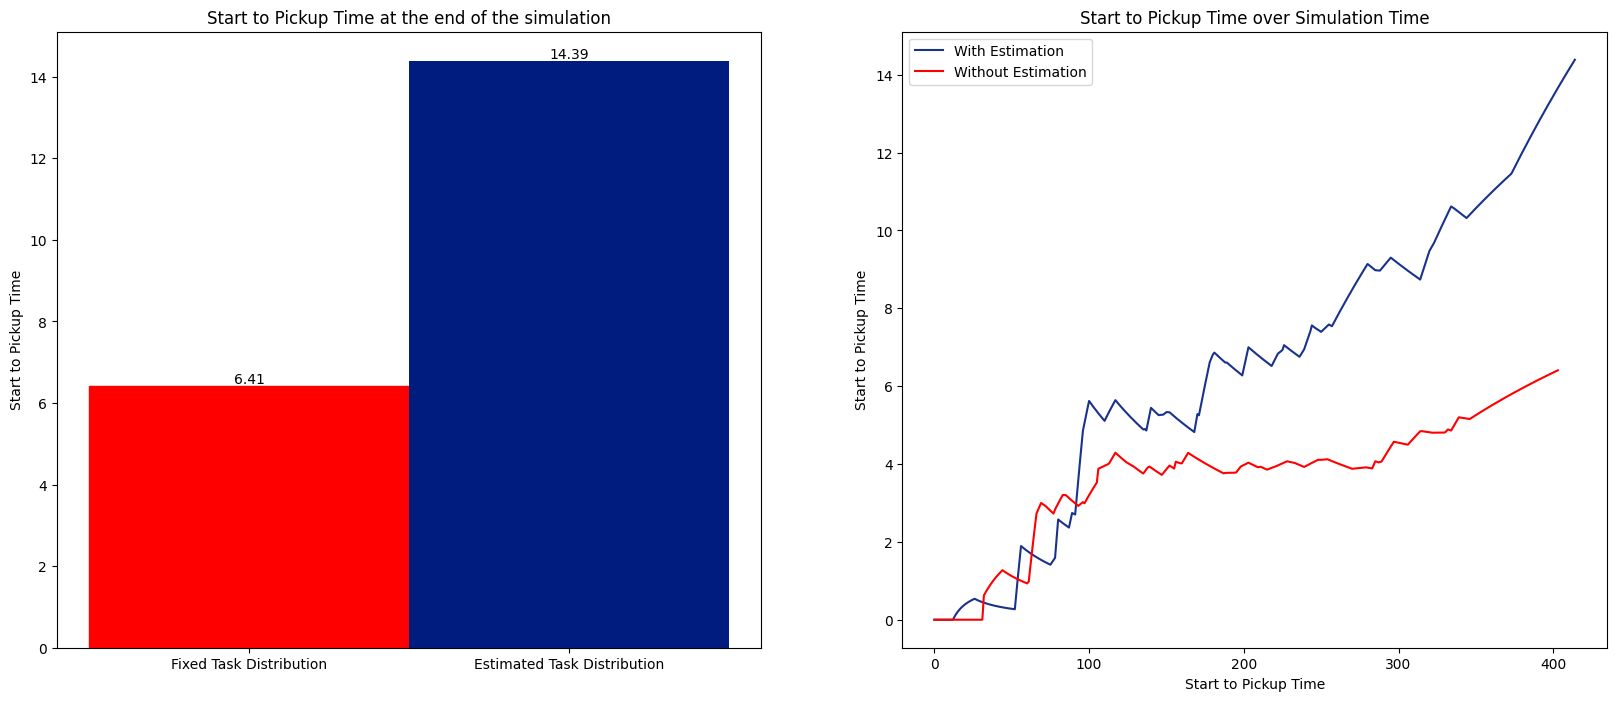

In [74]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["start_to_pickup_times"].iloc[-1], df_learning["start_to_pickup_times"].iloc[-1]], width=1,
                 align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(df["start_to_pickup_times"].iloc[-1]), "{:.2f}".format(df_learning["start_to_pickup_times"].iloc[-1])])
bars[0].set_color('r')
ax[0].set_title("Start to Pickup Time at the end of the simulation")
ax[0].set_ylabel("Start to Pickup Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["start_to_pickup_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["start_to_pickup_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Start to Pickup Time')
ax[1].set_xlabel('Start to Pickup Time')
ax[1].set_title('Start to Pickup Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()